<a href="https://colab.research.google.com/github/PedroAC18/Projeto_Grafos/blob/main/Trabalho_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-396-2687815a1391>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


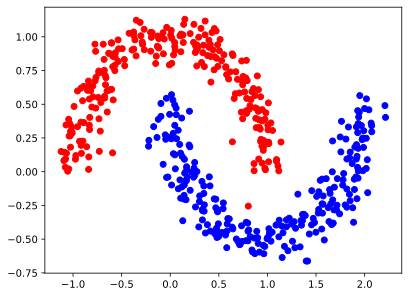

In [ ]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg', 'pdf')

import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons #biblioteca para gerar a base de dados

n = 500 #numero de amostras
n_labeled = 5 #numero de amostras que estarao rotulados
alpha = 0.1
sigma = 0.2
#Portanto, ao ajustar o valor de sigma, você pode controlar a influência dos
# pontos mais distantes em relação ao centro da distribuição gaussiana na função de base radial gaussiana.
#noise = desvio do ruído gaussiano (o rúido impacta na distribuição das amostras)
#shuffle = define se as amostras serão embaralhadas ou não
#random state = seed para a geração aleatória (nenhuma nesses testes)

X, Y = make_moons(n, shuffle=True, noise=0.1, random_state=None) #gera a base de dados de 2 luas,
# utilizado para replicar os testes no artigo "Learning with Local and Global Consistency"
# print(X) #Printa o X (coordenadas de cada amostra)
# print(type((Y[:n_labeled,None] == np.arange(2)).astype(float))) #é criada uma matriz booleana comparando os primeiros
# n_labeled elementos da variável Y com os valores 0 e 1.
#Os valores são convertidos para float
#O resultado da expressão anterior é passado para a função type(), que retorna o tipo de objeto.

#print(np.zeros((n-n_labeled,2))[:3])



color = ['red' if l == 0 else 'blue' for l in Y] #2 cores, uma para cada label
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()
# Formatando os dados retirando as label
Y_input = np.concatenate(((Y[:n_labeled,None] == np.arange(2)).astype(float), np.zeros((n-n_labeled,2))))
#Matriz booleana comparando os primeiros n_labeled elementos da variável Y com os valores 0 e 1.
#Valores são convertidos para float e o resultado da expressão anterior é passado para a função type(), que retorna o tipo de objeto

In [ ]:
def euclidean(baseDeDados): #Função eucilidiana da base de dados
  allDistEuclidean = [] #Armazena todas as distancias euclidianas
  for element1 in baseDeDados: #Armazena cada elemento da base de dados no array
    array = [];
    for element2 in baseDeDados: #Percorre cada elemento da base de dados
      distEuclidean = np.sqrt(np.sum(np.square(element1- element2))) #Calcula a distancia euclidiana entre o elemento 1 e o elemento 2
      array.append(distEuclidean) #A distancia euclidiana é armazenada no array
    allDistEuclidean.append(array) #O resultado é retornado como um array NumPy, convertendo a lista allDistEuclidean em um array.
  return np.array(allDistEuclidean)#Retorna o array NumPy

In [ ]:
def  baseRadialGaussian(x): #Função de base radial gaussiana para o valor x
  return math.exp((-x)/(2*(math.pow(sigma,2)))) #A expressão calcula o valor exponencial do resultado
  #obtido ao dividir -x por 2 vezes o quadrado de sigma

In [ ]:
dm = euclidean(X)#Distancia euclidiana
vfunc = np.vectorize(baseRadialGaussian) #Aplica a função baseRadialGaussian para cada elemento no array
W = vfunc(dm) #calcula uma matriz W com os valores resultantes da aplicação da função baseRadialGaussian em cada elemento de dm.
np.fill_diagonal(W, 0) #Preenche a diagonal da matriz W com zeros

In [ ]:
def calculate_S(W): #Cálculos relacionados a uma matriz de similaridade, com base na matriz W.
    d = np.sum(W, axis=1) #Soma dos elementos da linha da matriz
    D = np.sqrt(d*d[:, None]) #Matriz D é calculada a partir da multiplicação elemento a elemento do array d por si mesmo.
    return np.divide(W,D,where=D!=0) #Matriz W é dividida elemento a elemento pela matriz D

import math

S = calculate_S(W) #Realiza cálculos relacionados à similaridade ou afinidade com base em W, e retorna uma matriz S

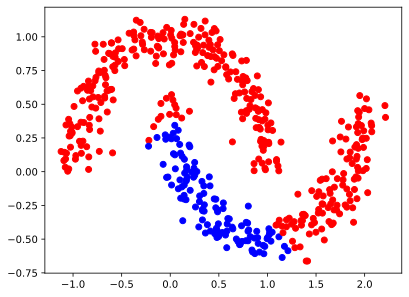

In [ ]:
F = np.dot(S, Y_input)*alpha + (1-alpha)*Y_input
#np.dot(S, Y_input): A função np.dot é usada para realizar a multiplicação de matrizes entre S e Y_input. Essa multiplicação resulta em uma nova matriz em que cada elemento (i, j) é calculado somando o produto dos elementos correspondentes das linhas de S e colunas de Y_input.
#np.dot(S, Y_input) * alpha: O resultado da multiplicação entre S e Y_input é multiplicado pelo valor de alpha. Isso significa que cada elemento da matriz resultante é multiplicado por alpha.
#(1 - alpha) * Y_input: A matriz Y_input é multiplicada por (1 - alpha). Isso significa que cada elemento de Y_input é multiplicado por (1 - alpha).
#np.dot(S, Y_input) * alpha + (1 - alpha) * Y_input: Os resultados dos passos 2 e 3 são somados elemento a elemento, resultando na matriz F.
# Iterate F (t + 1) = αSF (t) + (1 − α)Y


Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]
#No geral, essas linhas realizam uma codificação one-hot dos resultados contidos na matriz F.
#O vetor Y_v representa a primeira coluna dessa codificação, em que 1 indica a classe predominante e 0 indica as demais classes.


color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_1.pdf", format='pdf')
plt.show()